In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import torch
from torch.utils.data import Dataset, DataLoader

%matplotlib inline

### Dataset Generation

<font color='red'>**The following cells take some time to execute. Run them only when you want to generate datasets.**

In [3]:
# Generate datasets (each dataset contains 100000 images)

# 1. Image size: 32x32, binary images
!python gen_data.py --c 100000 --s 32 --f planar_arm_bin_32_100k --b

In [4]:
# 2. Image size: 32x32, grayscale images
!python gen_data.py --c 100000 --s 32 --f planar_arm_gray_32_100k

In [5]:
# 3. Image size: 64x64, binary images
!python gen_data.py --c 100000 --s 64 --f planar_arm_bin_64_100k --b

In [6]:
# 4. Image size: 64x64, grayscale images
!python gen_data.py --c 100000 --s 64 --f planar_arm_gray_64_100k

In [9]:
# 5. Image size: 128x128, binary images
!python gen_data.py --c 100000 --s 128 --f planar_arm_bin_128_100k --b

In [10]:
# 6. Image size: 128x128, grayscale images
!python gen_data.py --c 100000 --s 128 --f planar_arm_gray_128_100k

### Load Images from the Dataset

In [33]:
image_sizes = [32, 64]
file_types = ["bin", "gray"]

for img_size in image_sizes:
    for f_type in file_types:
        dataset_file_path = f"planar_arm_{f_type}_{img_size}_100k.npz"

        if os.path.isfile(dataset_file_path):
            print(f"File:{dataset_file_path}")
            np_image_data = np.load(dataset_file_path)['array']
            print(f"Count of images:{np_image_data.shape[0]}")
            print(f"Shape:{np_image_data[0].shape}")
            print(f"Type:{np_image_data.dtype}")
            print(f"Min:{np.min(np_image_data)}, max:{np.max(np_image_data)}")
            print("----------")

File:planar_arm_bin_32_100k.npz
Count of images:100000
Shape:(32, 32)
Type:float64
Min:0.0, max:1.0
----------
File:planar_arm_gray_32_100k.npz
Count of images:100000
Shape:(32, 32)
Type:float64
Min:0.0, max:0.7333333333333333
----------
File:planar_arm_bin_64_100k.npz
Count of images:100000
Shape:(64, 64)
Type:float64
Min:0.0, max:1.0
----------
File:planar_arm_gray_64_100k.npz
Count of images:100000
Shape:(64, 64)
Type:float64
Min:0.0, max:0.8666666666666667
----------


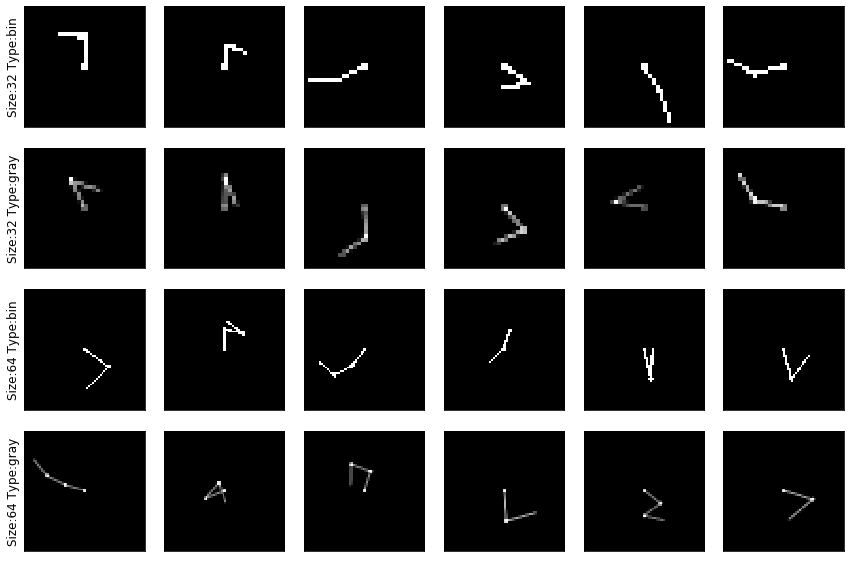

In [47]:

image_sizes = [32, 64]
file_types = ["bin", "gray"]

rows = 4
cols = 6
r = 0
fig, ax = plt.subplots(rows, cols, figsize=(12, 8))

for img_size in image_sizes:
    for f_type in file_types:
        dataset_file_path = f"planar_arm_{f_type}_{img_size}_100k.npz"
        np_image_data = np.load(dataset_file_path)['array']            
        idx = np.random.choice(np_image_data.shape[0], cols, replace=False)
        for c in range(cols):
            if c==0:
                ax[r][c].set_ylabel(f"Size:{img_size} Type:{f_type}", fontsize=12)
            ax[r][c].imshow(np_image_data[idx[c]], cmap='gray')
            ax[r][c].set_yticklabels([])
            ax[r][c].set_xticklabels([])
            ax[r][c].set_yticks([])
            ax[r][c].set_xticks([])
        r += 1

plt.tight_layout()

### Using the Dataset in PyTorch

In [49]:
# How to use the images in PyTorch

class CustomDataset(Dataset):

    def __init__(self, x):
        self.x = torch.from_numpy(x).float()

    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        # Select sample
        x = self.x[index]

        # Load data and get label
        x = self.x[index]
        y = 0

        return x, y
    
dataset_file_path = "planar_arm_bin_64_100k.npz"
np_image_data = np.load(dataset_file_path)['array']     
torch_image_data = CustomDataset(np_image_data)
torch_image_dataloader = DataLoader(torch_image_data, batch_size=32, shuffle=True, drop_last=True)

In [51]:
# Dummy training loop
# Each batch has 128 images of size 128x128
for batch_idx, (data, _) in enumerate(torch_image_dataloader):
    print(f"Batch: {batch_idx}, Tensor shape: {data.shape}, Min: {torch.min(data)}, Max: {torch.max(data)}")

Batch: 0, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 3, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 4, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 5, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 6, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 7, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 8, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 9, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 10, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 11, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 12, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 13, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 14, Tensor shape: torch

Batch: 514, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 515, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 516, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 517, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 518, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 519, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 520, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 521, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 522, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 523, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 524, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 525, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 526, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 527, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch:

Batch: 1034, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1035, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1036, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1037, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1038, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1039, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1040, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1041, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1042, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1043, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1044, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1045, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1046, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1047, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, M

Batch: 1556, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1557, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1558, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1559, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1560, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1561, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1562, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1563, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1564, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1565, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1566, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1567, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1568, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 1569, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, M

Batch: 2079, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2080, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2081, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2082, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2083, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2084, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2085, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2086, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2087, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2088, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2089, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2090, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2091, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2092, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, M

Batch: 2600, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2601, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2602, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2603, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2604, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2605, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2606, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2607, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2608, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2609, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2610, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2611, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2612, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 2613, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, M

Batch: 3114, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 3115, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 3116, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 3117, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 3118, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 3119, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 3120, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 3121, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 3122, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 3123, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
Batch: 3124, Tensor shape: torch.Size([32, 64, 64]), Min: 0.0, Max: 1.0
